# TP 3 - Introducción al aprendizaje automatizado
### Juan Ignacio Farizano

--------------------------------------------------------------------------------

In [1]:
# Imports iniciales
%matplotlib inline
from common import *
from naivebayes import *

--------------------------------------------------------------------------------
## Ejercicio 1

In [2]:
bins = 5
errors = []

for d in [2 ** i for i in range(1, 6)]:
  x_col_names = list(range(d))
  y_col_name = 'Class'

  # Genero los conjuntos de test para cada d
  df_test_diag = generate_diagonal(d, 10000, 0.78)
  df_test_para = generate_parallel(d, 10000, 0.78)

  X_test_diag, y_test_diag = df_test_diag[x_col_names], df_test_diag[y_col_name]
  X_test_para, y_test_para = df_test_para[x_col_names], df_test_para[y_col_name]

  for i in range(20):
    # Genero los conjuntos de entrenamiento
    df_train_diag = generate_diagonal(d, 250, 0.78)
    df_train_para = generate_parallel(d, 250, 0.78)

    X_train_diag, y_train_diag = df_train_diag[x_col_names], df_train_diag[y_col_name]
    X_train_para, y_train_para = df_train_para[x_col_names], df_train_para[y_col_name]

    # Creo las redes neuronales
    clf_diag = GaussianNB()
    clf_para = GaussianNB()

    clf_diag.fit(X_train_diag, y_train_diag)
    clf_para.fit(X_train_para, y_train_para)

    predict_train_diag = clf_diag.predict(X_train_diag)
    predict_test_diag = clf_diag.predict(X_test_diag)
    predict_train_para = clf_para.predict(X_train_para)
    predict_test_para = clf_para.predict(X_test_para)

    actual_error_train_diag = 1 - accuracy_score(y_train_diag, predict_train_diag)
    actual_error_test_diag = 1 - accuracy_score(y_test_diag, predict_test_diag)  
    actual_error_train_para = 1 - accuracy_score(y_train_para, predict_train_para)
    actual_error_test_para = 1 - accuracy_score(y_test_para, predict_test_para)

    errors.append([actual_error_train_diag, d, "Gaussian NB - Train diagonal"])
    errors.append([actual_error_test_diag, d, "Gaussian NB - Test diagonal"])
    errors.append([actual_error_train_para, d, "Gaussian NB - Train parallel"])
    errors.append([actual_error_test_para, d, "Gaussian NB - Test parallel"])

ej1_errors_bayes_df = pd.DataFrame(errors, columns = ["Error", "d", "Class"])
ej1_errors_bayes_df.to_csv("datasets/dimensions/bayes_dimensions_errors.csv", index = False)

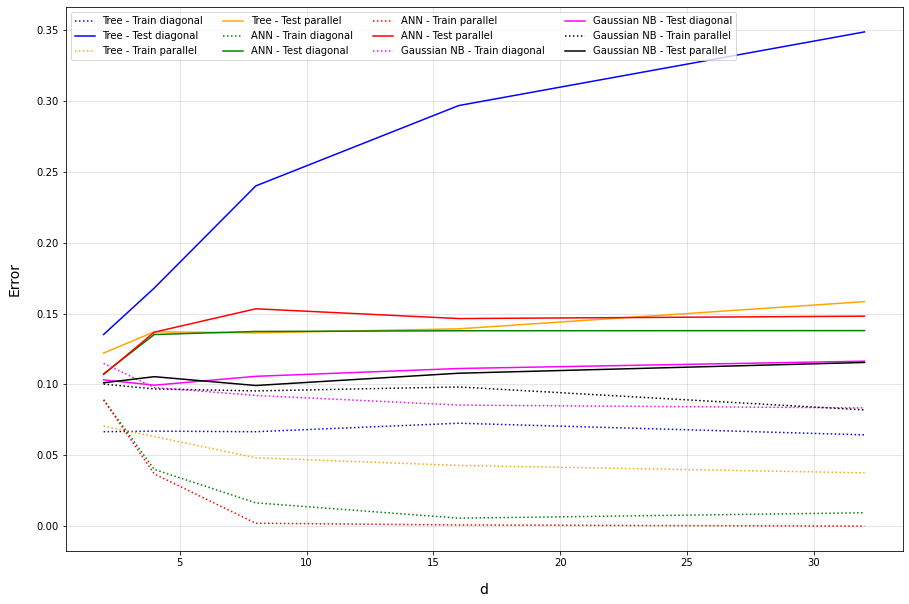

In [3]:
ej1_errors_tree_df = pd.read_csv("datasets/dimensions/tree_dimensions_errors.csv")
ej1_errors_ann_df = pd.read_csv("datasets/dimensions/ann_dimensions_errors.csv")
ej1_errors_bayes_df = pd.read_csv("datasets/dimensions/bayes_dimensions_errors.csv")
ej1_errors_df = pd.concat([ej1_errors_tree_df, ej1_errors_ann_df, ej1_errors_bayes_df])
graph_errors_dimensions(ej1_errors_df)

### Conclusiones

En el gráfico podemos ver que los errores de test para este modelo son menores a
todos los modelos anteriores utilizados para clasificar en ambos problemas,
creo que esto es debido a que estamos usando un modelo que asume que las clases
siguen una distribucióngaussiana o normal, cosa que es así ya que para generar 
los puntos utilizo la función multivariate_normal que genera los puntos siguiendo
la distribución antes mencionada.

Además estos puntos se generan con una matriz de covarianza diagonal, lo que hace
que las coordenadas de los puntos sean independientes entre sí, cosa que también
asume Naives Bayes, por lo que nuestro modelo se adapta perfectamente a estos
problemas obteniendo solo un poco de error gracias a la dispersión de los puntos
provocada por la covarianza dada.

Otra cosa a notar es que el error de entrenamiento es más alto que en los demás
modelos, por lo que puedo pensar que este modelo es menos propenso al sobreajuste.

--------------------------------------------------------------------------------
## Ejercicio 2

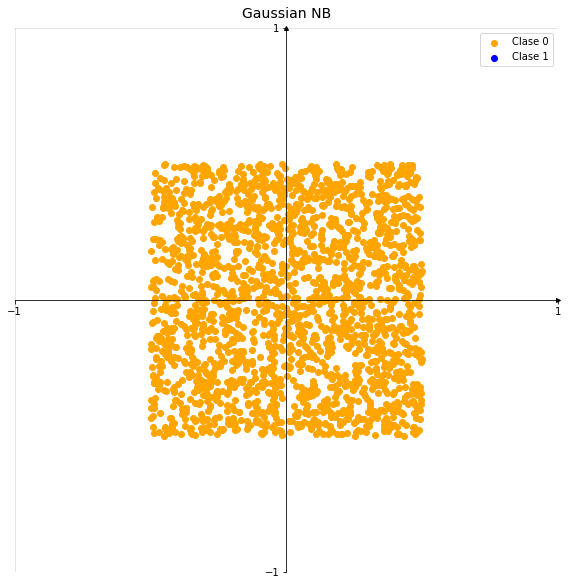

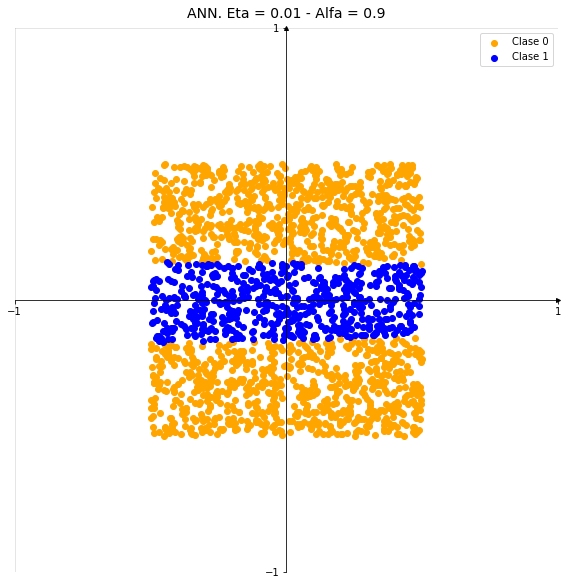

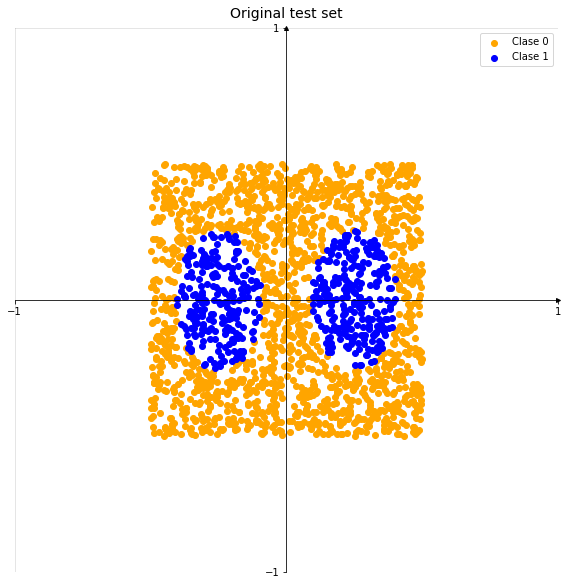

In [9]:
col_names = [0, 1, 'Class']
x_col_names = col_names[:-1]
y_col_name = col_names[-1]

# Leo el conjunto de datos utilizado para entrenar y vaidar
df_data_elipses = pd.read_csv("datasets/elipses/dos_elipses.data", header=None, names = col_names)
# Separo un 20% al azar para conjunto de validación
X, y = df_data_elipses[x_col_names], df_data_elipses[y_col_name]
X_train, _, y_train, _ = train_test_split(X, y, random_state=0, test_size=0.2)

# Leo el conjunto de test
df_test_elipses = pd.read_csv("datasets/elipses/dos_elipses.test", header=None, names = col_names)
X_test, y_test = df_test_elipses[x_col_names], df_test_elipses[y_col_name]

clf = GaussianNB()
clf.fit(X_train, y_train)

predict_test = clf.predict(X_test)
frame = {0 : X_test[0], 1 : X_test[1], 'Class' : predict_test}
df_predict_test = pd.DataFrame(frame, columns=[0, 1, 'Class'])

df_ann_predict = pd.read_csv("datasets/elipses/ann_predict.data", header=0, names = col_names)

graph_df(df_predict_test, title="Gaussian NB")
graph_df(df_ann_predict, title="ANN. Eta = 0.01 - Alfa = 0.9")
graph_df(df_test_elipses, title="Original test set")


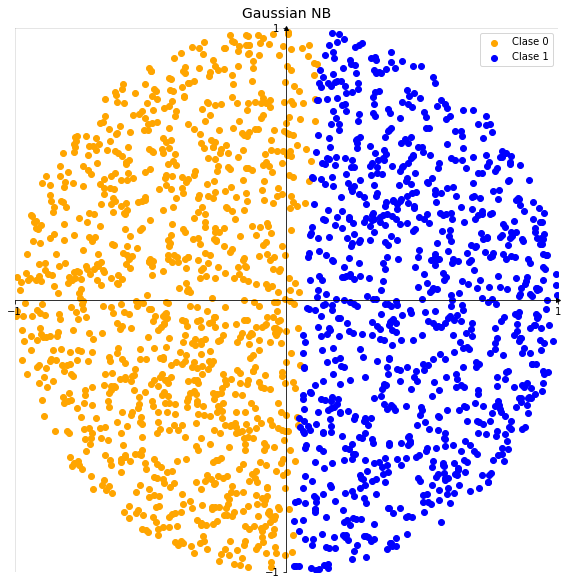

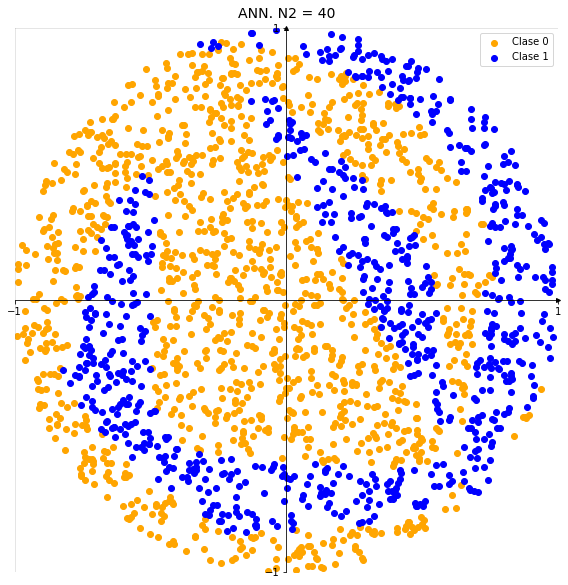

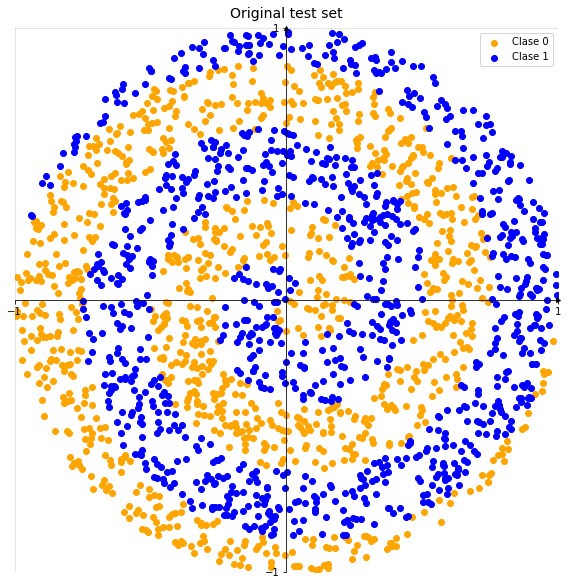

In [10]:
x_col_names = col_names[:-1]
y_col_name = col_names[-1]

# Creo el conjunto de datos utilizado para entrenar y vaidar
df_data_spirals = generate_spirals(600)
# Separo un 20% al azar para conjunto de validación
X_data, y_data = df_data_spirals[x_col_names], df_data_spirals[y_col_name]
X_train, _, y_train, _ = train_test_split(X_data, y_data, random_state=0, test_size=0.2)

# Genero el conjunto de test
df_test_spirals = generate_spirals(2000)
X_test, y_test = df_test_spirals[x_col_names], df_test_spirals[y_col_name]

clf = GaussianNB()
clf.fit(X_train, y_train)

predict_test = clf.predict(X_test)
frame = {0 : X_test[0], 1 : X_test[1], 'Class' : predict_test}
df_predict_test = pd.DataFrame(frame, columns=[0, 1, 'Class'])

df_ann_predict = pd.read_csv("datasets/spirals_ann_predict.data", header=0, names = col_names)

graph_df(df_predict_test, title = "Gaussian NB")
graph_df(df_ann_predict, title="ANN. N2 = 40")
graph_df(df_test_spirals, title = "Original test set")

### Conclusiones
Como se pueden ver, los resultados son bastante malos, especialmente en el 
problema de las dos elipses donde todos los puntos son clasificados como clase 0.

No sabría explicar bien estos resultados.

En comparación a lo visto con redes neuronales, para estos problemas Naives
Bayes resulta ser inferior, aunque igualmente ambos modelos obtuvieron resultados
que no consideraría satisfactorios.

--------------------------------------------------------------------------------
## Ejercicio 3

La función se encuentra para importar en el archivo naivebayes.py, acá la dejo
escrita en markdown para no definir 2 veces.

```python
def train_Categorical_NB(n_bins, X_train, y_train, X_val, y_val, X_test, y_test):
  best_val_error = math.inf
  
  errors = []

  for bins in n_bins:
    kbdisc = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy='uniform')
    kbdisc.fit(X_train)

    X_train_disc = kbdisc.transform(X_train.copy())
    X_val_disc = kbdisc.transform(X_val.copy())
    X_test_disc = kbdisc.transform(X_test.copy())

    clf = CategoricalNB(min_categories=bins)
    clf.fit(X_train_disc, y_train)

    predict_train = clf.predict(X_train_disc)
    predict_val = clf.predict(X_val_disc)
    predict_test= clf.predict(X_test_disc)

    actual_train_error = 1 - accuracy_score(y_train, predict_train)
    actual_val_error = 1 - accuracy_score(y_val, predict_val)
    actual_test_error = 1 - accuracy_score(y_test, predict_test)

    errors.append([actual_train_error, bins, "Train error"])
    errors.append([actual_val_error, bins, "Validation error"])
    errors.append([actual_test_error, bins, "Test error"])

    if actual_val_error < best_val_error:
      best_val_error = actual_val_error
      best_bins = bins
      best_clf = deepcopy(clf)
      best_kbdisc = deepcopy(kbdisc)

  errors_df = pd.DataFrame(errors, columns = ["Error", "Bins", "Class"])

  return best_bins, best_clf, best_kbdisc, errors_df
```

--------------------------------------------------------------------------------
## Ejercicio 4

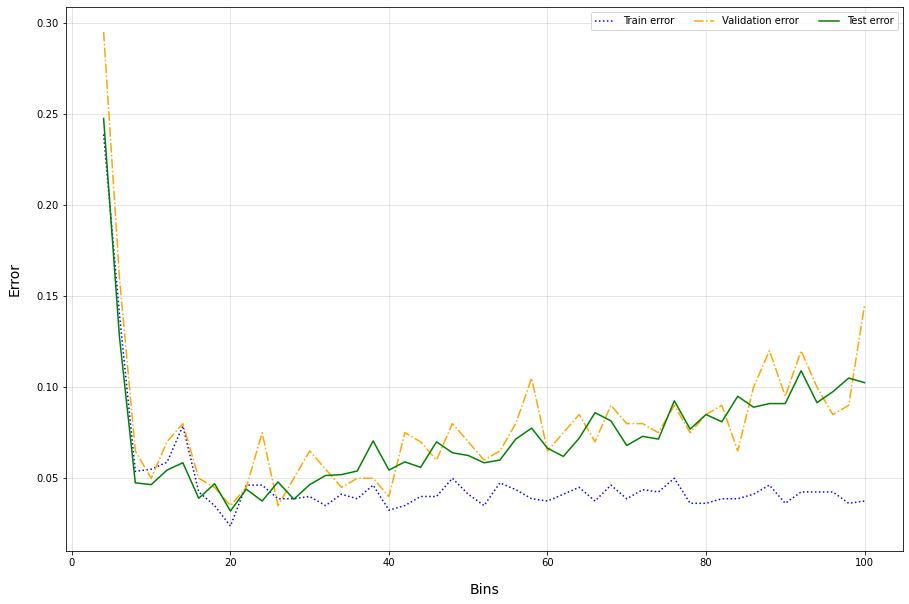

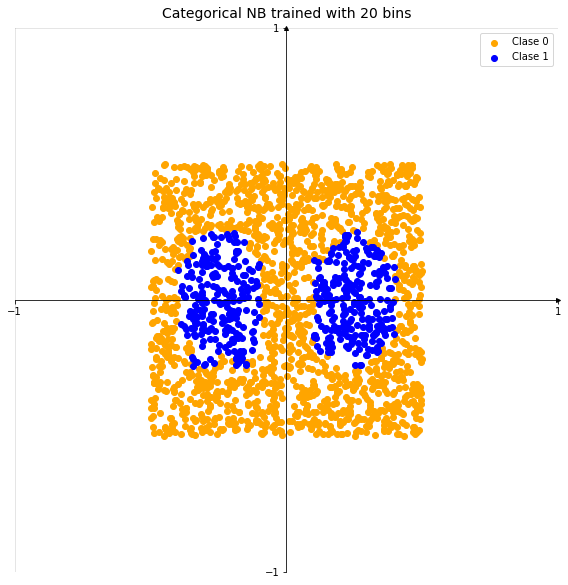

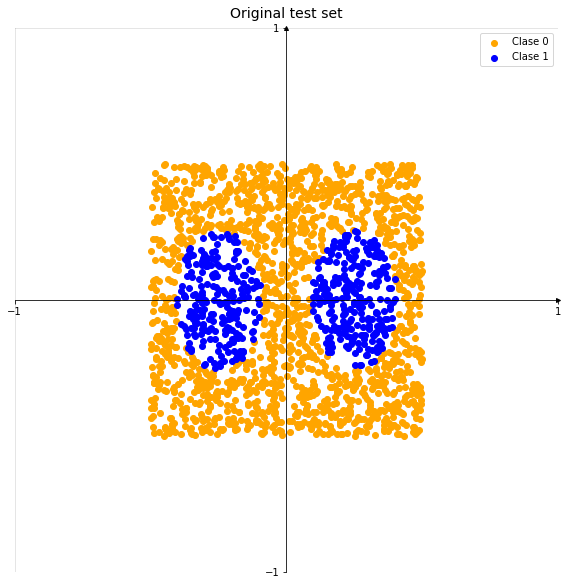

In [29]:
col_names = [0, 1, 'Class']
x_col_names = col_names[:-1]
y_col_name = col_names[-1]

# Leo el conjunto de datos utilizado para entrenar y vaidar
df_data_elipses = pd.read_csv("datasets/elipses/dos_elipses.data", header=None, names = col_names)
# Separo un 20% al azar para conjunto de validación
X, y = df_data_elipses[x_col_names], df_data_elipses[y_col_name]
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0, test_size=0.2)

# Leo el conjunto de test
df_test_elipses = pd.read_csv("datasets/elipses/dos_elipses.test", header=None, names = col_names)
X_test, y_test = df_test_elipses[x_col_names], df_test_elipses[y_col_name]

n_bins = range(4, 102, 2)

best_bins, best_clf, best_kbdisc, errors_df = train_Categorical_NB(n_bins, X_train, y_train, X_val, y_val, X_test, y_test)

graph_errors(errors_df, "Bins")

X_test_disc = best_kbdisc.transform(X_test.copy())
predict_test = best_clf.predict(X_test_disc)

frame = {0 : X_test[0], 1 : X_test[1], 'Class' : predict_test}
df_predict_test = pd.DataFrame(frame, columns=[0, 1, 'Class'])

graph_df(df_predict_test, title="Categorical NB trained with {0} bins".format(best_bins))
graph_df(df_test_elipses, title="Original test set")

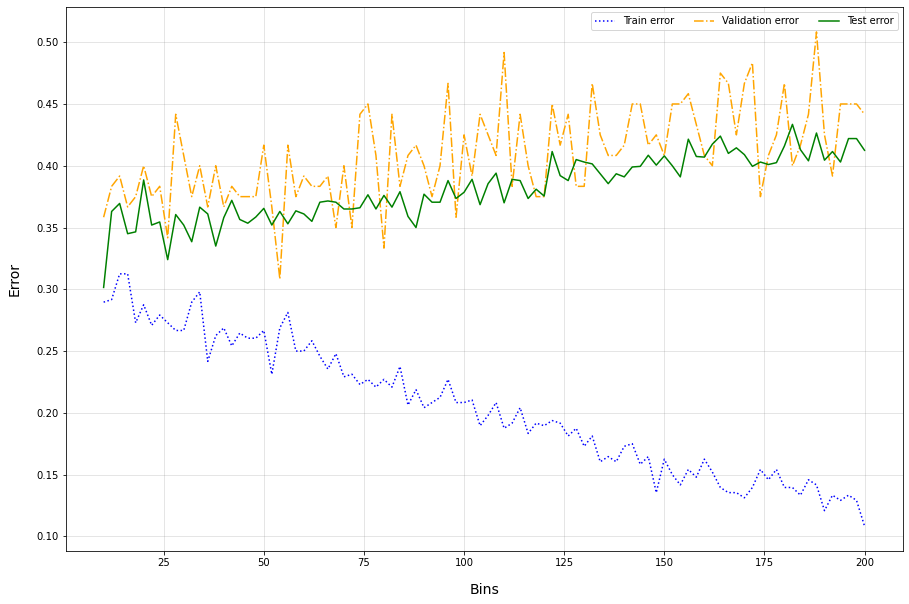

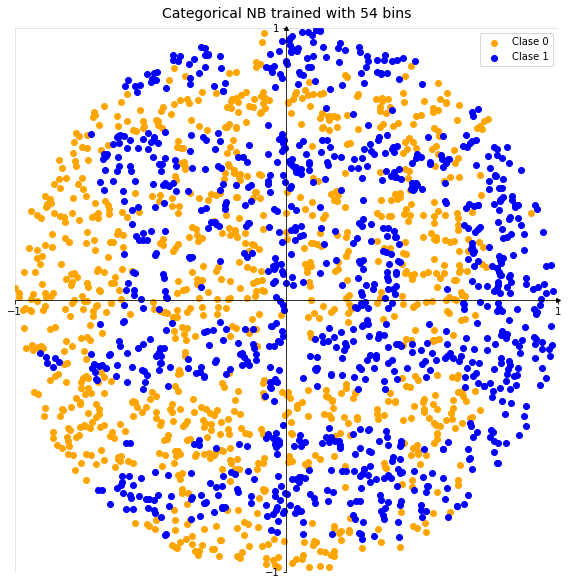

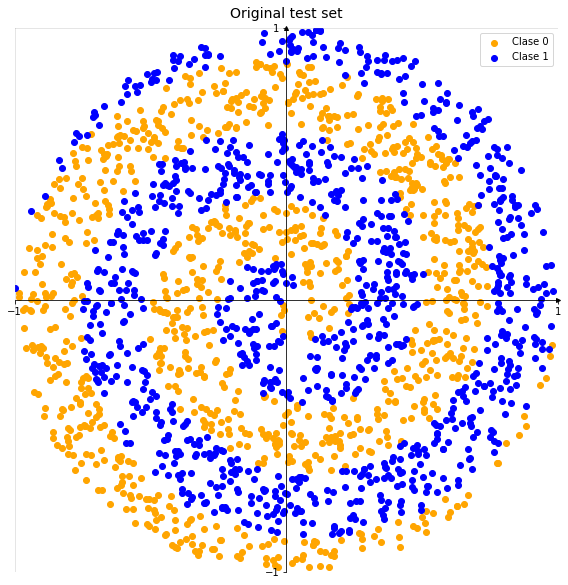

In [31]:
col_names = [0, 1, 'Class']
x_col_names = col_names[:-1]
y_col_name = col_names[-1]

# Creo el conjunto de datos utilizado para entrenar y vaidar
df_data_spirals = generate_spirals(600)
# Separo un 20% al azar para conjunto de validación
X_data, y_data = df_data_spirals[x_col_names], df_data_spirals[y_col_name]
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, random_state=0, test_size=0.2)

# Genero el conjunto de test
df_test_spirals = generate_spirals(2000)
X_test, y_test = df_test_spirals[x_col_names], df_test_spirals[y_col_name]

n_bins = list(range(10, 202, 2))

best_bins, best_clf, best_kbdisc, errors_df = train_Categorical_NB(n_bins, X_train, y_train, X_val, y_val, X_test, y_test)

graph_errors(errors_df, "Bins")

X_test_disc = best_kbdisc.transform(X_test.copy())
predict_test = best_clf.predict(X_test_disc)

frame = {0 : X_test[0], 1 : X_test[1], 'Class' : predict_test}
df_predict_test = pd.DataFrame(frame, columns=[0, 1, 'Class'])

graph_df(df_predict_test, title="Categorical NB trained with {0} bins".format(best_bins))
graph_df(df_test_spirals, title="Original test set")

### Conclusiones
Para el problema de las dos elipses inmediatamente se nota que los resultados
son superiores, obteniendo un error bajo y en el gráfico las formas de las elipses
se mantienen parecidas a las originales, donde en los interiores de ellas todos
los puntos se encuentran bien clasificados y luego los bordes es un poco menos preciso.

Del problema de las espirales no se podría decir lo mismo, el error sigue siendo
alto, los puntos parecen clasificados casi de forma aleatoria y las siluetas
de las espirales no aparecen.

Puedo suponer que la diferencia en estos problemas se debe a que el gráfico
de las espirales es más fácil de dividir en cuadrantes con bordes rectos,
mientras que en las espirales los bordes son curvos y no tan definidos.

Por último, viendo el gráfico de error del problemas de las espirales se puede
decir que este problema es mucho más propenso al sobreajuste a medida que crece
la cantidad de bins.

--------------------------------------------------------------------------------
## Ejercicio 5

Mejor largo de diccionario: 10000 mejor alfa: 0.01


,Largo de diccionario,Alfa,Train error,Validation error,Test error
0,400,0.00001,0.405539,0.474019,0.534519
1,400,0.00010,0.406011,0.474019,0.534121
2,400,0.00100,0.406718,0.472959,0.534121
3,400,0.01000,0.407543,0.472959,0.533723
4,400,0.10000,0.409193,0.475080,0.533457
5,400,1.00000,0.415793,0.479675,0.534519
6,1000,0.00001,0.259988,0.355249,0.417817
7,1000,0.00010,0.260577,0.349947,0.413436
8,1000,0.00100,0.261874,0.346766,0.410913
9,1000,0.01000,0.263642,0.346766,0.407329


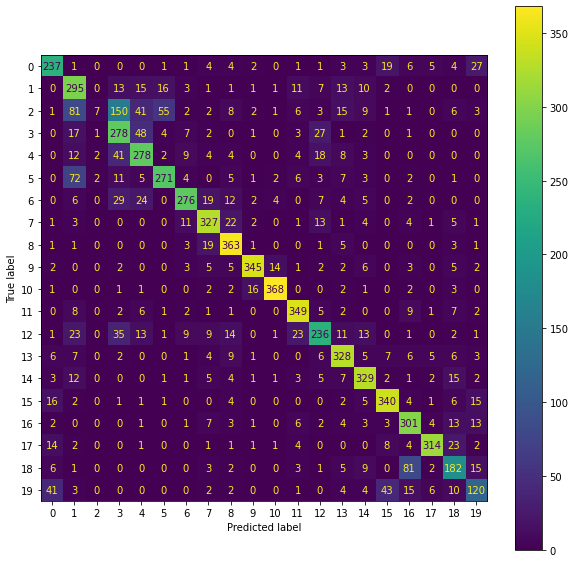

In [20]:

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

X, y = fetch_20newsgroups(subset="train",return_X_y=True, remove=["headers"])
X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.25, random_state=1)
X_test, y_test = fetch_20newsgroups(subset="test",return_X_y=True,remove=["headers"])

best_val_error = math.inf
table = []

for largo_diccionario in [400, 1000, 2500, 4000, 6000, 10000]:
  for alfa in [10 ** i for i in range(-5, 1)]:
    vec = CountVectorizer(stop_words='english',max_features=largo_diccionario)
    Xvec_train = vec.fit_transform(X_train).toarray()
    Xvec_val = vec.transform(X_val).toarray()
    Xvec_test = vec.transform(X_test).toarray()

    clf = MultinomialNB(alpha=alfa)
    clf.fit(Xvec_train, y_train)

    predict_train = clf.predict(Xvec_train)
    predict_val = clf.predict(Xvec_val)
    predict_test = clf.predict(Xvec_test)

    actual_train_error = 1 - accuracy_score(y_train, predict_train)
    actual_val_error = 1 - accuracy_score(y_val, predict_val)
    actual_test_error = 1 - accuracy_score(y_test, predict_test)
    
    table.append([largo_diccionario, alfa, actual_train_error, actual_val_error, actual_test_error])

    if actual_val_error < best_val_error:
      best_val_error = actual_val_error
      best_largo = largo_diccionario
      best_alfa = alfa
      best_predict_test = deepcopy(predict_test)

print("Mejor largo de diccionario: {0} mejor alfa: {1}".format(best_largo, best_alfa, best_val_error))
table_df = pd.DataFrame(table, columns = ["Largo de diccionario", "Alfa", "Train error", "Validation error", "Test error"])
display(table_df)

fig, ax = plt.subplots(figsize=(10, 10))
ConfusionMatrixDisplay.from_predictions(y_test, best_predict_test, display_labels=clf.classes_, ax=ax)
plt.show()

### Conclusiones

La mejor combinación de parámetros fue un largo de diccionario de 10000 y un alfa de 0.01.

Como se puede ver en la tabla, a mayor tamaño del diccionario menor el error resulta ser,
donde a partir de 4000 palabras el error resulta ser cerca de la mitad del error obtenido
con un largo de 400. Puedo asumir (sin saber mucho sobre el conjunto), que con un 
diccionario más chico la separación de textos en tópicos resulta ser más general
ya que el modelo sólo se entrena a partir de las palabras más utilizadas, y a medida
que el diccionario aumenta en su tamaño la predicción puede diferenciar mejor
entre sub-tópicos y resulta más precisa.

Sobre el alfa no podría decir mucho.

En la matriz de confusión se puede ver que para la mayoría de las clases la 
predicción es buena excepto en algunos casos, por ej. en la clase 2 donde la
mayoría de sus datos son predichos dentro de las clases 1 y 3, este me pareció
el resultado más particular dentro de lo observado, podría suponer que son tópicos
o sub-tópicos muy similares donde la diferencia es sutil.

En la tabla con todas las combinaciones de largo de diccionario y alfas no
logro observar sobreajuste y el comportamiento en validación parece ser representativo
del conjunto de test.
